In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#inline matplotlib
import seaborn as sns

In [3]:
data = pd.read_csv('forestfires.csv')

In [4]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
data.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [6]:
data['area'].value_counts()

0.00     247
1.94       3
3.71       2
0.90       2
1.95       2
2.14       2
2.18       2
1.56       2
9.96       2
28.66      2
1.46       2
0.68       2
0.43       2
1.64       2
6.43       2
9.27       2
0.52       2
1.75       2
11.06      2
1.63       2
17.20      1
48.55      1
0.95       1
0.77       1
11.19      1
15.64      1
2.64       1
3.52       1
38.48      1
5.39       1
        ... 
1.61       1
1.07       1
6.38       1
5.86       1
3.19       1
11.16      1
8.85       1
86.45      1
5.18       1
30.18      1
2.01       1
1.01       1
20.03      1
0.79       1
49.59      1
4.41       1
7.02       1
0.71       1
9.41       1
0.09       1
3.32       1
11.53      1
5.55       1
3.20       1
4.88       1
1.26       1
2.44       1
2.03       1
2.21       1
24.24      1
Name: area, Length: 251, dtype: int64

In [7]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [8]:
corr=data.corr()

In [9]:
corr

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


# HeatMap

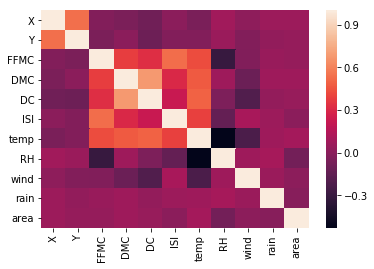

In [10]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)



# Distribution Plots on Features

C:\Users\Dinesh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


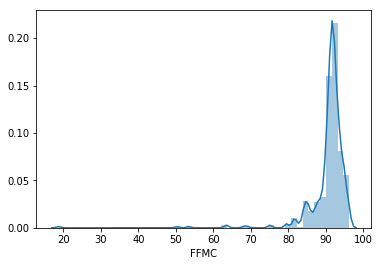

In [11]:
sns.distplot(data['FFMC'])

C:\Users\Dinesh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


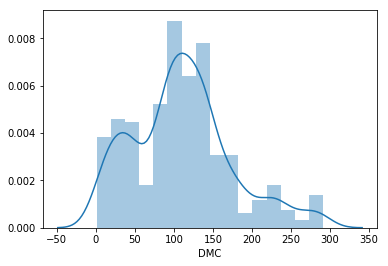

In [12]:
sns.distplot(data['DMC'])

C:\Users\Dinesh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


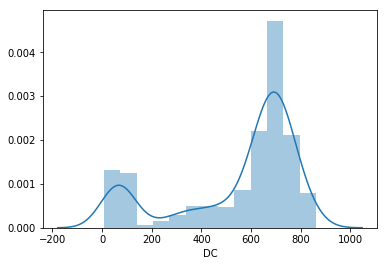

In [13]:
sns.distplot(data['DC'])

C:\Users\Dinesh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


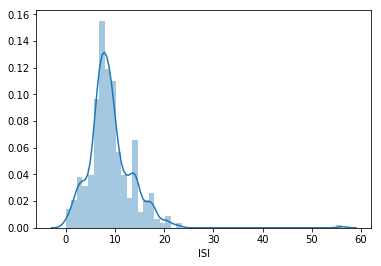

In [14]:
sns.distplot(data['ISI'])

C:\Users\Dinesh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


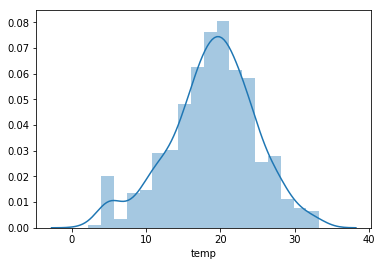

In [15]:
sns.distplot(data['temp'])

C:\Users\Dinesh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


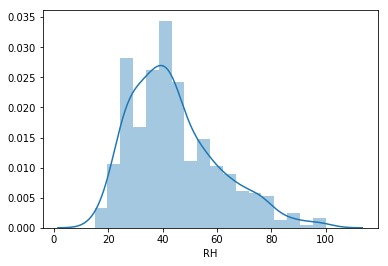

In [16]:
sns.distplot(data['RH'])

C:\Users\Dinesh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


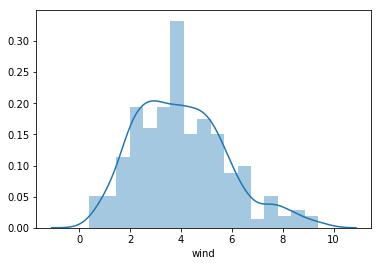

In [17]:
sns.distplot(data['wind'])

# PairPlot of features

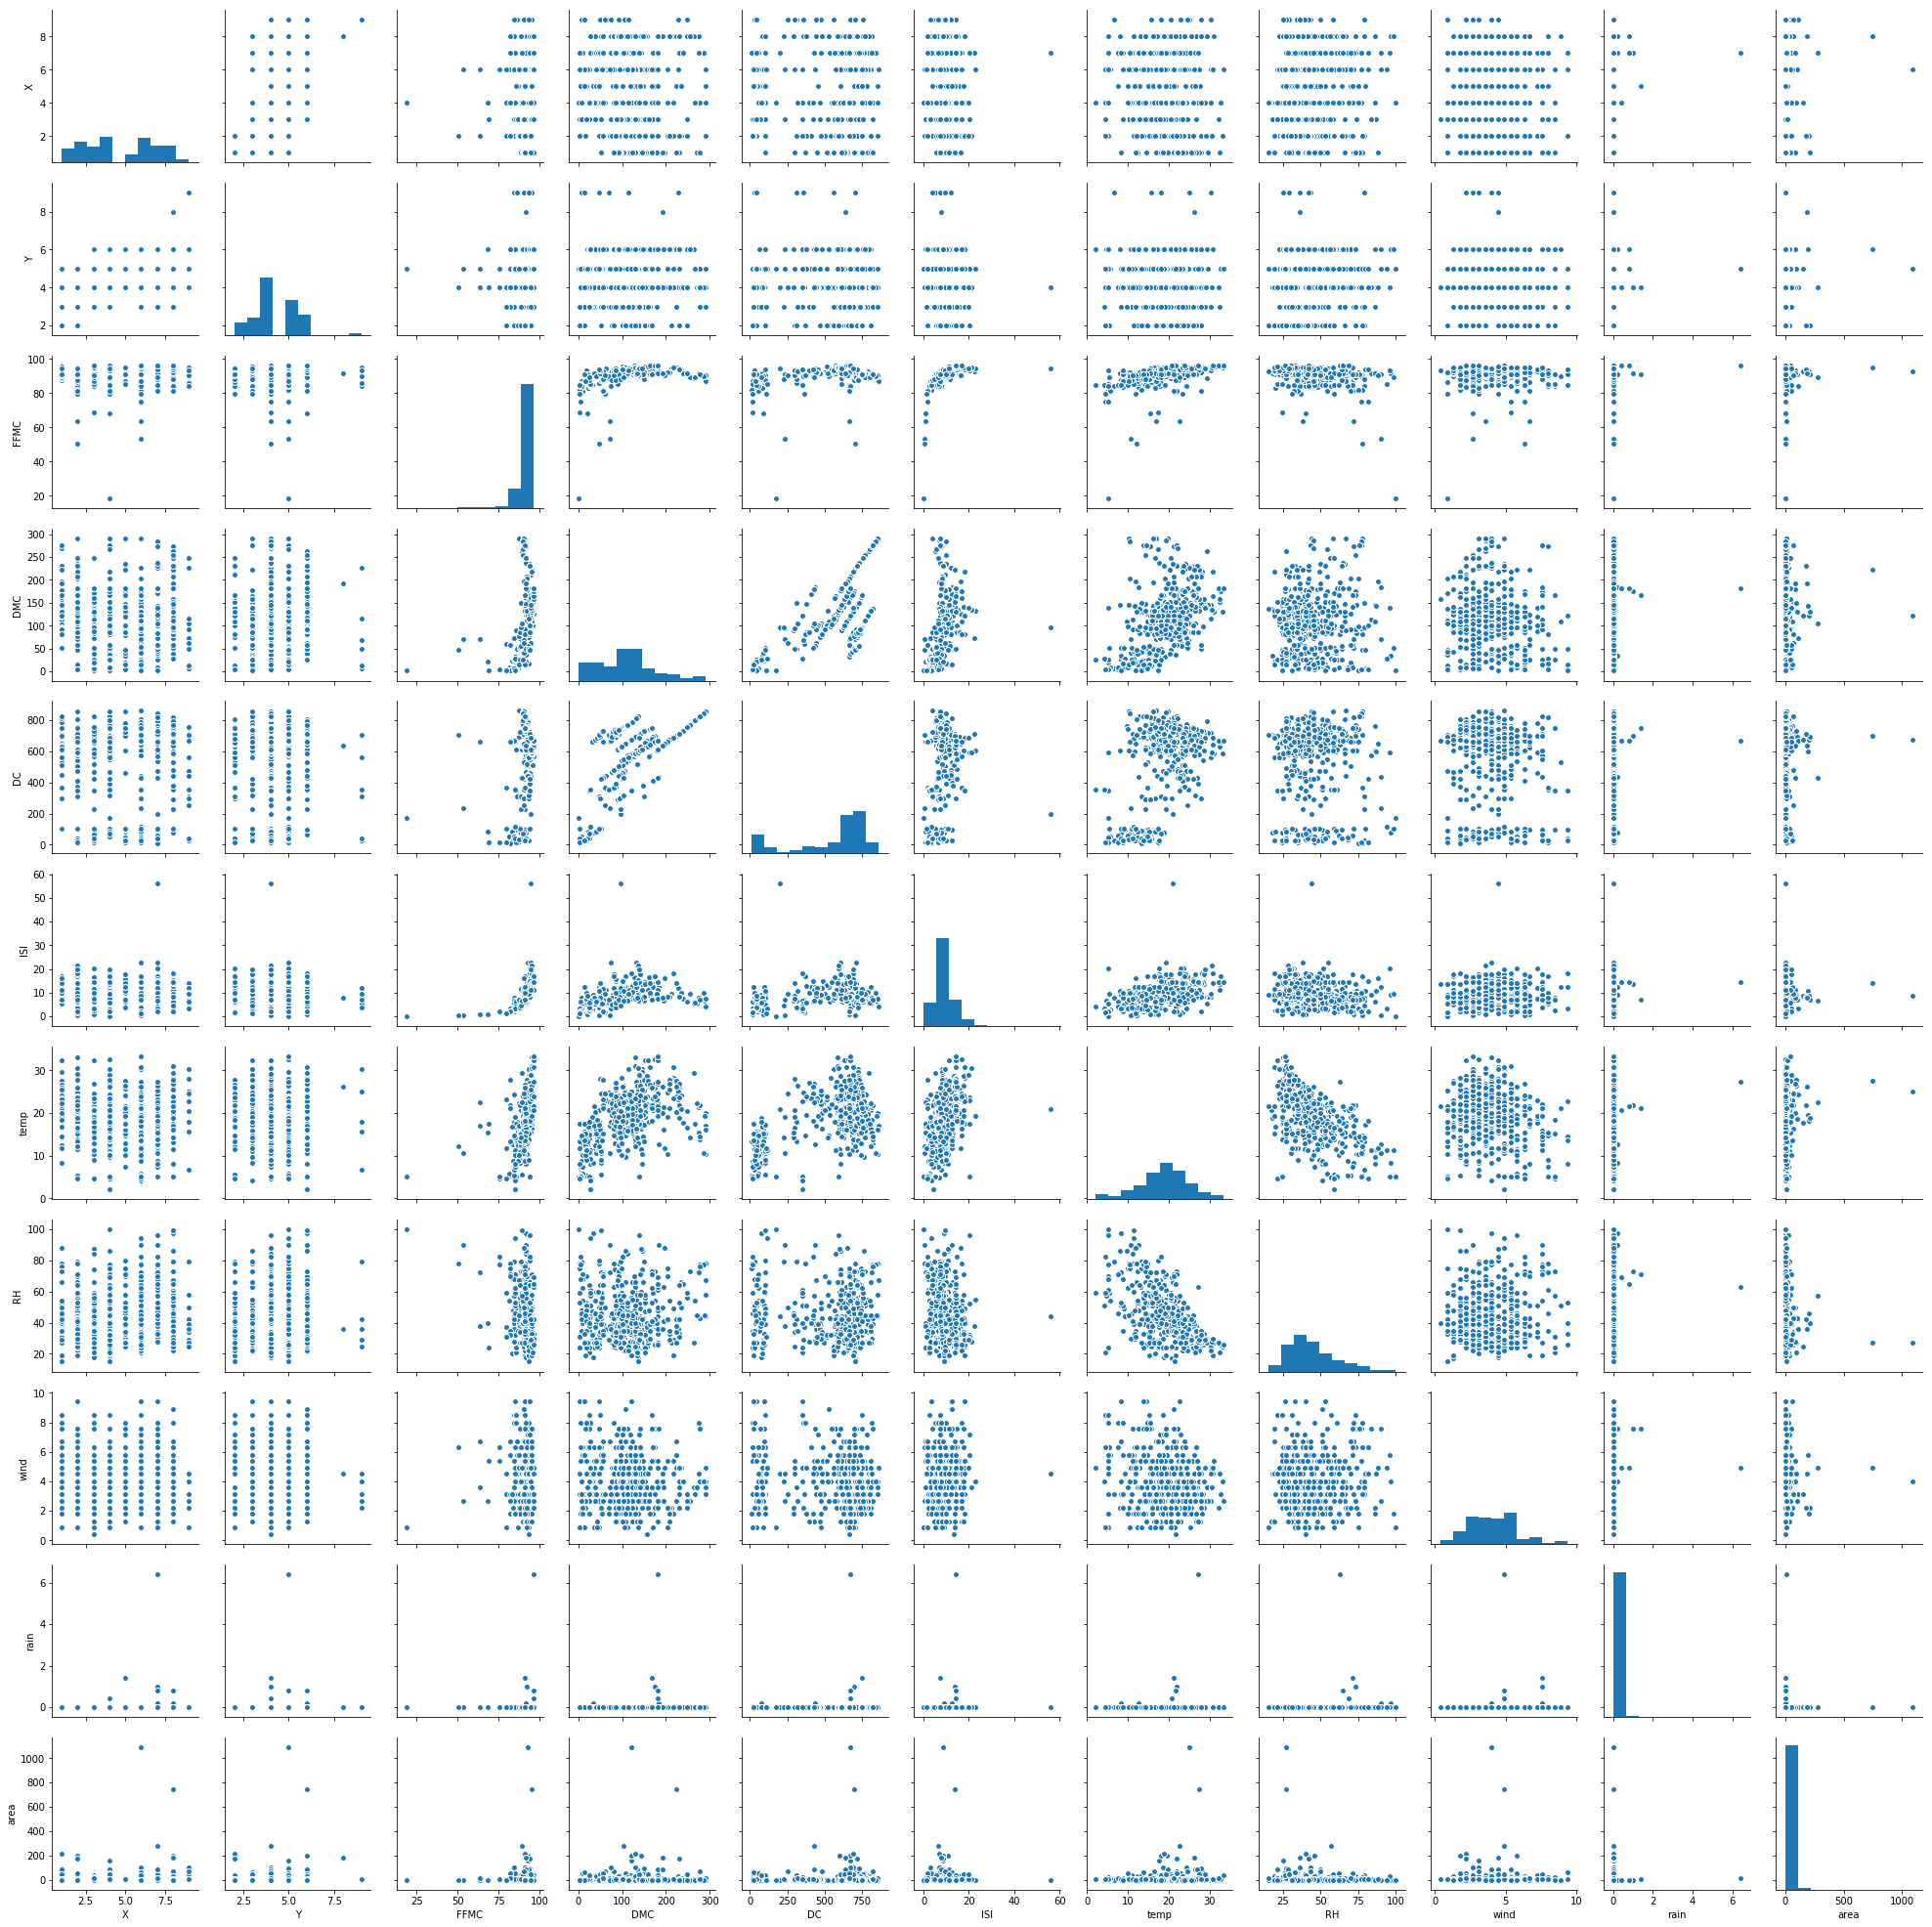

In [18]:
sns.pairplot(data)

# Box Plot of features

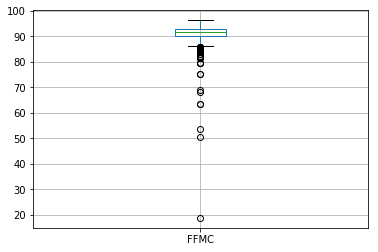

In [19]:
data.boxplot(column="FFMC")

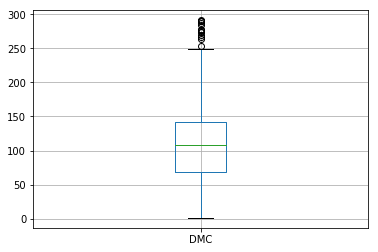

In [20]:
data.boxplot(column="DMC")

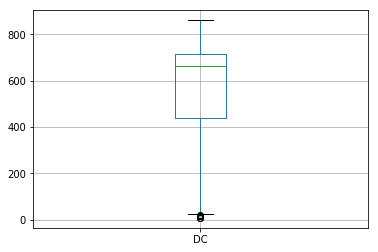

In [21]:
data.boxplot(column="DC")

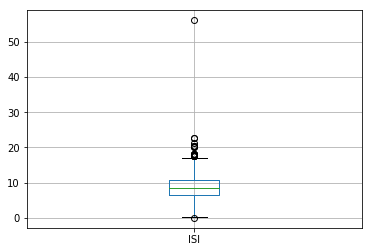

In [22]:
data.boxplot(column="ISI")

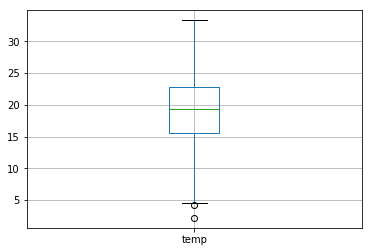

In [23]:
data.boxplot(column="temp")

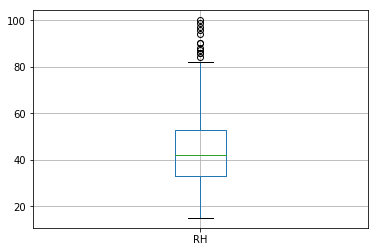

In [24]:
data.boxplot(column="RH")

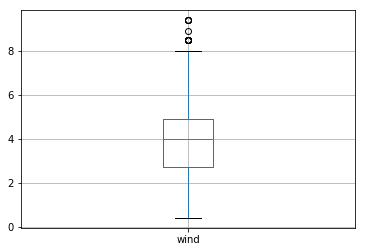

In [25]:
data.boxplot(column="wind")

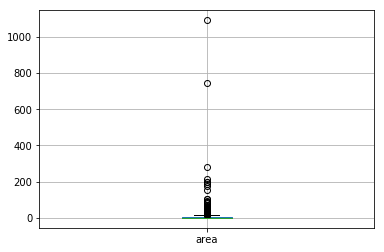

In [26]:
data.boxplot(column="area")

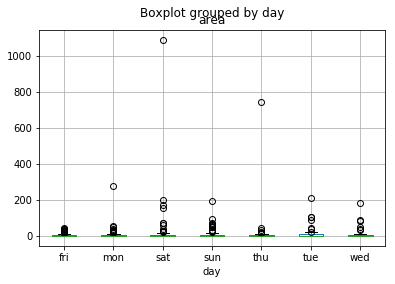

In [27]:
data.boxplot(column="area",by="day")

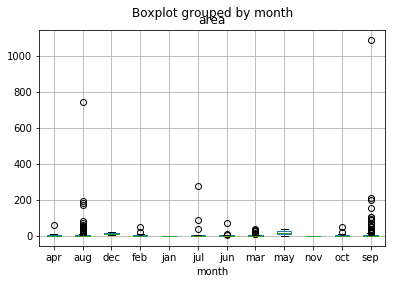

In [28]:
data.boxplot(column="area",by="month")

# Simple Linear Regression

In [29]:
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [30]:
reg=linear_model.LinearRegression()

In [31]:
features=pd.DataFrame(data.iloc[:,:-1])

In [32]:
features.drop(columns=["X","Y","day","month"],inplace=True)

In [33]:
labels=pd.DataFrame(data.iloc[:,-1])

In [34]:
for i in features.columns:
    X_train,X_test,y_train,y_test= train_test_split(features[i],labels,test_size=0.3,random_state=1)
    X_train=X_train.values.reshape(-1,1)
    X_test=X_test.values.reshape(-1,1)
    model=reg.fit(X_train,y_train)
    score=model.score(X_test,y_test)
    y_pred = model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    r2score=r2_score(y_test,y_pred)
    print(i,"  Score = ",score,"\tRMSE = ",rmse,"\tr2_Score = ",r2score)

FFMC   Score =  0.0024621689215466036 	RMSE =  62.869114572778706 	r2_Score =  0.0024621689215466036
DMC   Score =  0.010564126389809081 	RMSE =  62.61328398991745 	r2_Score =  0.010564126389809081
DC   Score =  0.0025583205696952938 	RMSE =  62.86608455503421 	r2_Score =  0.0025583205696952938
ISI   Score =  -0.0011974579723830203 	RMSE =  62.98433169161939 	r2_Score =  -0.0011974579723830203
temp   Score =  0.016683816863298007 	RMSE =  62.419351137520415 	r2_Score =  0.016683816863298007
RH   Score =  0.008530761923832064 	RMSE =  62.677588451938405 	r2_Score =  0.008530761923832064
wind   Score =  0.00013284246743439088 	RMSE =  62.94247384704906 	r2_Score =  0.00013284246743439088
rain   Score =  -0.01775241783310566 	RMSE =  63.50292471792531 	r2_Score =  -0.01775241783310566


In [35]:
data['area'].mean()

12.847292069632491

In [36]:
data[data['area']>=200]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
236,2,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53


# Normalization of Data

In [37]:
data=pd.read_csv('forestfires.csv')

In [38]:
data['day'].replace(['sun','mon','tue','wed','thu','fri','sat'],[1,2,3,4,5,6,7],inplace=True)
data['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)

In [39]:
#data=data.drop(columns=['X','Y','day','month'])

In [40]:
x=data.iloc[:,:-1]

In [41]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler(feature_range=(0,1))
features=pd.DataFrame(minmax.fit(x).transform(x))

In [42]:
x.shape

(517, 12)

In [43]:
labels=pd.DataFrame(data.iloc[:,-1])

In [44]:
X_train,X_test,y_train,y_test= train_test_split(x,labels,test_size=0.3,random_state=1)
#X_train=X_train.values.reshape(-1,1)
#X_test=X_test.values.reshape(-1,1)
model=reg.fit(X_train,y_train)
score=model.score(X_test,y_test)
y_pred = model.predict(X_test)
rmse=mean_squared_error(y_true=y_test,y_pred=y_pred)
r2score=r2_score(y_true=y_test,y_pred=y_pred)
print("  Score = ",score,"\tRMSE = ",rmse,"\tr2_Score = ",r2score)

  Score =  0.021557347582511044 	RMSE =  3876.8650964385142 	r2_Score =  0.021557347582511044


In [45]:
data['area'].max()

1090.84

In [46]:
data['area'].count()

517

In [47]:
270/517

0.5222437137330754

# Multi Linear model

In [48]:
from itertools import combinations

In [49]:
cols=data.columns

In [50]:
cols=cols.delete(loc=-1)

In [53]:
comb=list(map(list,combinations(cols,3)))

In [52]:
acc=[]
for i in comb:
    x=data[i]
    y=data.iloc[:,-1]
    X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)
    model=reg.fit(X_train,y_train)
    score=model.score(X_test,y_test)
    y_pred = model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    r2score=r2_score(y_test,y_pred)
    acc.append(r2score)
    print(i,"  Score = ",score,"\tRMSE = ",rmse,"\tr2_Score = ",r2score)

['X', 'Y']   Score =  0.0010208675233158715 	RMSE =  76.3053527764163 	r2_Score =  0.0010208675233158715
['X', 'month']   Score =  0.007189531800202319 	RMSE =  76.0693963969017 	r2_Score =  0.00718953180020232
['X', 'day']   Score =  0.0031859502530464656 	RMSE =  76.22261981105943 	r2_Score =  0.0031859502530464656
['X', 'FFMC']   Score =  0.006419193679976787 	RMSE =  76.09890242806124 	r2_Score =  0.006419193679976787
['X', 'DMC']   Score =  0.014969996017352825 	RMSE =  75.77073952053796 	r2_Score =  0.014969996017352827
['X', 'DC']   Score =  0.008583910832092312 	RMSE =  76.01595878522444 	r2_Score =  0.008583910832092312
['X', 'ISI']   Score =  0.0024797676445513783 	RMSE =  76.24961459437056 	r2_Score =  0.0024797676445513783
['X', 'temp']   Score =  0.021615120315626624 	RMSE =  75.51472801132428 	r2_Score =  0.021615120315626624
['X', 'RH']   Score =  0.013215228105556642 	RMSE =  75.83819985146751 	r2_Score =  0.013215228105556642
['X', 'wind']   Score =  0.0033262533393823

In [383]:
max(acc)

0.026211297597138694

In [384]:
acc.index(max(acc))

37

In [385]:
comb[37]

['X', 'DMC', 'RH']

In [386]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]


In [387]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn import tree

In [388]:
area=[]
for i in data['area']:
    if(i==0):
        area.append(0)
    else:
        area.append(1)

In [389]:
X_train,X_test,y_train,y_test= train_test_split(x,area,test_size=0.2,random_state=1)

In [390]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
predicted_y = decision_tree.predict(X_test)

In [391]:
accuracy_score(y_test, predicted_y)

0.47115384615384615

In [392]:
from sklearn.neighbors import KNeighborsClassifier

In [393]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [394]:
accuracy_score(y_test,y_pred)

0.5096153846153846

In [395]:
d=data[data['area']!=0]

In [396]:
d.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,4.807407,4.366667,7.759259,3.955556,91.034074,114.707778,570.867037,9.177037,19.311111,43.733333,4.112963,0.028889,24.600185
std,2.383326,1.170740,2.115048,2.108107,3.709020,61.786520,229.981242,4.147350,6.179444,15.080059,1.884573,0.398392,86.501635
min,1.000000,2.000000,2.000000,1.000000,63.500000,3.200000,15.300000,0.800000,2.200000,15.000000,0.400000,0.000000,0.090000
25%,3.000000,4.000000,8.000000,2.000000,90.325000,82.900000,486.500000,6.800000,16.125000,33.000000,2.700000,0.000000,2.140000
50%,5.000000,4.000000,8.000000,4.000000,91.700000,111.700000,665.600000,8.400000,20.100000,41.000000,4.000000,0.000000,6.370000
75%,7.000000,5.000000,9.000000,6.000000,92.975000,141.300000,721.325000,11.375000,23.400000,53.000000,4.900000,0.000000,15.422500
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,22.700000,33.300000,96.000000,9.400000,6.400000,1090.840000


# Minmax Normalization

In [397]:
from sklearn.preprocessing import MinMaxScaler

In [398]:
x=data.iloc[:,:-1]
minmax=MinMaxScaler(feature_range=(0,1))
x=pd.DataFrame(minmax.fit(x).transform(x))

In [399]:
y=data.iloc[:,-1]

In [400]:
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)

In [401]:
model=reg.fit(X_train,y_train)
score=model.score(X_test,y_test)
y_pred = model.predict(X_test)
rmse=mean_squared_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
print("  Score = ",score,"\tRMSE = ",rmse,"\tr2_Score = ",r2score)

  Score =  0.017804414230555454 	RMSE =  5724.684682970177 	r2_Score =  0.017804414230555454


In [402]:
data[data['area']>=200]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
236,2,2,9,7,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94
237,1,2,9,3,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,9,7,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,8,5,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,7,2,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53


# Simple Linear Regression Graphs

In [188]:
data=pd.read_csv("forestfires.csv")

In [350]:
reg=linear_model.LinearRegression()

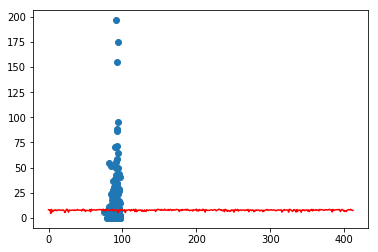

In [351]:
x=data['FFMC']
y=data['area']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
model=reg.fit(X_train,y_train)
y_pred = model.predict(X_train)
plt.scatter(X_train,y_train)
plt.plot(y_pred,color="r")

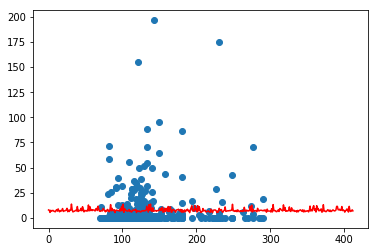

In [352]:
x=data['DMC']
y=data['area']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
model=reg.fit(X_train,y_train)
y_pred = model.predict(X_train)
plt.scatter(X_train,y_train)
plt.plot(y_pred,color="r")

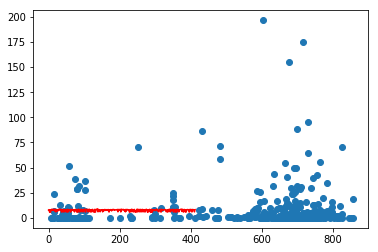

In [353]:
x=data['DC']
y=data['area']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
model=reg.fit(X_train,y_train)
y_pred = model.predict(X_train)
plt.scatter(X_train,y_train)
plt.plot(y_pred,color="r")

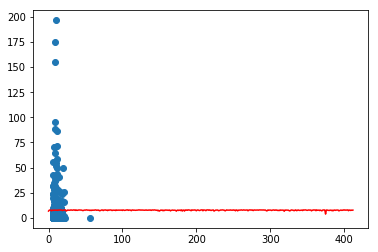

In [354]:
x=data['ISI']
y=data['area']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
model=reg.fit(X_train,y_train)
y_pred = model.predict(X_train)
plt.scatter(X_train,y_train)
plt.plot(y_pred,color="r")

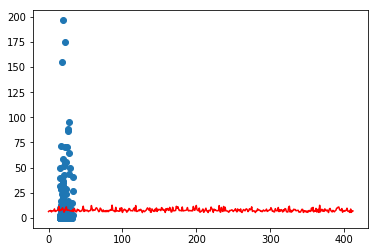

In [355]:
x=data['temp']
y=data['area']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
model=reg.fit(X_train,y_train)
y_pred = model.predict(X_train)
plt.scatter(X_train,y_train)
plt.plot(y_pred,color="r")

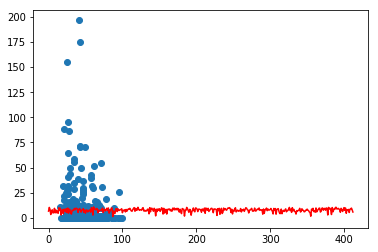

In [356]:
x=data['RH']
y=data['area']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
model=reg.fit(X_train,y_train)
y_pred = model.predict(X_train)
plt.scatter(X_train,y_train)
plt.plot(y_pred,color="r")

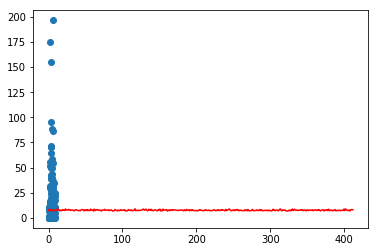

In [357]:
x=data['wind']
y=data['area']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
model=reg.fit(X_train,y_train)
y_pred = model.predict(X_train)
plt.scatter(X_train,y_train)
plt.plot(y_pred,color="r")

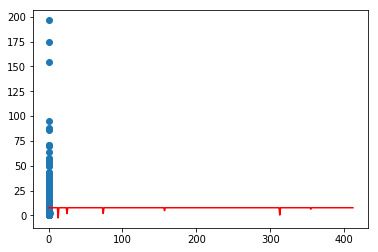

In [358]:
x=data['rain']
y=data['area']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
model=reg.fit(X_train,y_train)
y_pred = model.predict(X_train)
plt.scatter(X_train,y_train)
plt.plot(y_pred,color="r")